## Log Regession

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [4]:

df = pd.read_csv('/content/drive/MyDrive/DATA 606 Capstone Project/Datasets and Information/CSVs/ML_dataset.csv')

plt.figure(figsize=(50,10))

model = LinearRegression()

target = 'median_sale_price'

<Figure size 3600x720 with 0 Axes>

In [5]:
'''  features = cols
  for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x=df[col]
    y=df[target]
    plt.scatter(y, x, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(target)
'''

"  features = cols\n  for i, col in enumerate(features):\n    plt.subplot(1, len(features), i+1)\n    x=df[col]\n    y=df[target]\n    plt.scatter(y, x, marker='o')\n    plt.title(col)\n    plt.xlabel(col)\n    plt.ylabel(target)\n"

In [10]:
years_single = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
years_bucket = ['2012|2013|2014','2015|2016|2017','2018|2019|2020|2021']

In [ ]:
lin_results = pd.DataFrame(columns=['Year','RMSE','R2'])

for year in years_single:
  
  print(year)
  
  df_year = df[df['period_begin'].str.contains(year)].drop('Unnamed: 0', axis=1)
  correlated = df_year.corr()
  #print(correlated)
  
  column_list=[]
  for i, r in correlated.iterrows():
    for x in correlated.columns:
      if i == x:
        next
      elif correlated.loc[i][x]>.35:
        #print(i," at ",x,": ",correlated[i][x])
        column_list.append(i)
        column_list.append(x)

  checker = np.array(column_list)
  cols = np.unique(checker).tolist()
  len(cols)
  cols = cols +['desert','property_type']
  #print(cols)



  main_df = df_year[cols].dropna()

  df_dummy = pd.get_dummies(data=main_df, drop_first=True)

  X = df_dummy.drop('median_sale_price', axis=1)
  Y = df_dummy[['median_sale_price']]

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
  print("X_train Shape: ",X_train.shape)
  print("X_test Shape:",X_test.shape)
  print("Y_train Shape:",Y_train.shape)
  print("Y_test Shape:",Y_test.shape)
  print("\n")

  
  model.fit(X_train, Y_train)
  y_train_predict = model.predict(X_train)
  rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
  r2 = r2_score(Y_train, y_train_predict)

  year_dict = {'Year':year,
                'RMSE':rmse,
                'R2':r2}
  lin_results = lin_results.append(year_dict, ignore_index=True)

  print("The model performance for training set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  # model evaluation for testing set
  y_test_predict = model.predict(X_test)
  rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
  r2 = r2_score(Y_test, y_test_predict)

  print("The model performance for testing set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n") 
  print("-------------------------------------------------")
  print("-------------------------------------------------")

  
  sns.regplot(x=Y_test, y=y_test_predict, ci=None, color="b")

  plt.show()

lin_results

2012|2013|2014
X_train Shape:  (839840, 26)
X_test Shape: (209960, 26)
Y_train Shape: (839840, 1)
Y_test Shape: (209960, 1)


The model performance for training set
--------------------------------------
RMSE is 67522.73477329582
R2 score is 0.8326291939951718


The model performance for testing set
--------------------------------------
RMSE is 62828.438620280765
R2 score is 0.8500024437894426


-------------------------------------------------
-------------------------------------------------


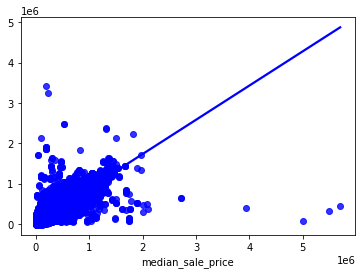

2015|2016|2017
X_train Shape:  (846197, 25)
X_test Shape: (211550, 25)
Y_train Shape: (846197, 1)
Y_test Shape: (211550, 1)


The model performance for training set
--------------------------------------
RMSE is 119639.6277512027
R2 score is 0.49238549298042755


The model performance for testing set
--------------------------------------
RMSE is 117231.53766141622
R2 score is 0.5031620133848689


-------------------------------------------------
-------------------------------------------------


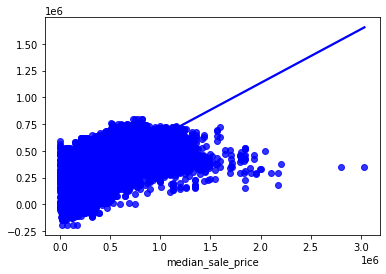

2018|2019|2020|2021
X_train Shape:  (1138865, 26)
X_test Shape: (284717, 26)
Y_train Shape: (1138865, 1)
Y_test Shape: (284717, 1)


The model performance for training set
--------------------------------------
RMSE is 76228.42012231049
R2 score is 0.8474155620283246


The model performance for testing set
--------------------------------------
RMSE is 76912.2274758545
R2 score is 0.8428679125368945


-------------------------------------------------
-------------------------------------------------


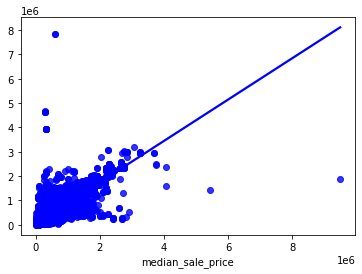

In [14]:
lin_results = pd.DataFrame(columns=['Year','RMSE','R2'])

for year in years_bucket:
  print(year)
  
  df_year = df[df['period_begin'].str.contains(year)].drop('Unnamed: 0', axis=1)
  correlated = df_year.corr()
  #print(correlated)
  
  column_list=[]
  for i, r in correlated.iterrows():
    for x in correlated.columns:
      if i == x:
        next
      elif correlated.loc[i][x]>.35:
        #print(i," at ",x,": ",correlated[i][x])
        column_list.append(i)
        column_list.append(x)

  checker = np.array(column_list)
  cols = np.unique(checker).tolist()
  len(cols)
  cols = cols +['desert','property_type']
  #print(cols)



  main_df = df_year[cols].dropna()

  df_dummy = pd.get_dummies(data=main_df, drop_first=True)

  X = df_dummy.drop('median_sale_price', axis=1)
  Y = df_dummy[['median_sale_price']]

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
  print("X_train Shape: ",X_train.shape)
  print("X_test Shape:",X_test.shape)
  print("Y_train Shape:",Y_train.shape)
  print("Y_test Shape:",Y_test.shape)
  print("\n")

  
  model.fit(X_train, Y_train)
  y_train_predict = model.predict(X_train)
  rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
  r2 = r2_score(Y_train, y_train_predict)

  year_dict = {'Year':year,
                'RMSE':rmse,
                'R2':r2}
  lin_results = lin_results.append(year_dict, ignore_index=True)

  print("The model performance for training set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  # model evaluation for testing set
  y_test_predict = model.predict(X_test)
  rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
  r2 = r2_score(Y_test, y_test_predict)

  print("The model performance for testing set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n") 
  print("-------------------------------------------------")
  print("-------------------------------------------------")

  
  sns.regplot(x=Y_test, y=y_test_predict, ci=None, color="b")

  plt.show()

lin_results

,Year,RMSE,R2
0,2012|2013|2014,67522.734773,0.832629
1,2015|2016|2017,119639.627751,0.492385
2,2018|2019|2020|2021,76228.420122,0.847416


In [ ]:
df_2015 = df[df['period_begin'].str.contains('2015')]
df_2016 = df[df['period_begin'].str.contains('2016')]

In [ ]:
df_2015['median_sale_price'].plot()

In [ ]:
df_2016['median_sale_price'].plot()

In [ ]:
df_2016['median_list_price'].plot()

In [ ]:
df_2016['median_list_price'].describe()

In [ ]:
new_desert = df[['zip','County','desert','avg_nearby_groche_counts','TotalPop','Transit','Walk','Drive','OtherTransp']]
new_desert.to_csv('/content/drive/MyDrive/DATA 606 Capstone Project/Datasets and Information/CSVs/new_desert.csv')

In [ ]:
new_desert_dum = pd.get_dummies(new_desert)

In [ ]:
new_desert_dum.corr()

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
f = new_desert_dum[['desert_Food Desert','desert_Well Fed','Transit','Walk','Drive','OtherTransp','avg_nearby_groche_counts']].corr()

sns.heatmap(f, annot=True)


In [ ]:
df.columns

# Decision Tree

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [ ]:
df[[''desert']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA 606 Capstone Project/Datasets and Information/CSVs/ML_dataset.csv')
#df = df.drop('Unnamed: 0', axis=1)
#df.to_csv('/content/drive/MyDrive/DATA 606 Capstone Project/Datasets and Information/CSVs/ML_dataset.csv')
# zip is categorical, so set change to str
#df['zip'] = df['zip'].astype(str)

In [ ]:
df['TotalPop'].describe()

In [ ]:
df['TotalPop']

In [ ]:
#df = df.drop('County',axis=1)
df = pd.get_dummies(df)

In [ ]:
labels = np.array(df['median_sale_price'])
df = df.drop('median_sale_price', axis=1)
df_list = list(df.columns)
#df = np.array(df)
df['TotalPop'].describe()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size = 0.26, random_state = 69)

In [ ]:
print("X_train Shape: ",x_train.shape)
print("X_test Shape:",x_test.shape)
print("Y_train Shape:",y_train.shape)
print("Y_test Shape:",y_test.shape)

In [ ]:
baseline_preds = x_test[:,df_list.index('median_list_price')]
baseline_errors = abs(baseline_preds - y_test)

print('Average baseline error: ', round(np.mean(baseline_errors),2))